<a href="https://colab.research.google.com/github/VISHAL2077/lab_assignments/blob/main/Assignment_10_SML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

file_path = '/content/breast_cancer_survival.csv'
data = pd.read_csv(file_path)

data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

(   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
 0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
 1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
 2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
 3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
 4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   
 
                        Histology ER status PR status HER2 status Surgery_type  \
 0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
 1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
 2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
 3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
 4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   
 
   Date_of_Surgery Date_of_Last_Visit Patient_Status  
 0       20-May-1

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = data.drop(columns=["Date_of_Surgery", "Date_of_Last_Visit"])

data = data.dropna(subset=["Patient_Status"])

label_encoder = LabelEncoder()
data["Gender"] = label_encoder.fit_transform(data["Gender"])
data["Tumour_Stage"] = label_encoder.fit_transform(data["Tumour_Stage"])
data["Histology"] = label_encoder.fit_transform(data["Histology"])
data["ER status"] = label_encoder.fit_transform(data["ER status"])
data["PR status"] = label_encoder.fit_transform(data["PR status"])
data["HER2 status"] = label_encoder.fit_transform(data["HER2 status"])
data["Surgery_type"] = label_encoder.fit_transform(data["Surgery_type"])
data["Patient_Status"] = label_encoder.fit_transform(data["Patient_Status"])

X = data.drop(columns=["Patient_Status"])
y = data["Patient_Status"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X[:5], y[:5]


(array([[-1.30717407, -0.11233119,  1.79364996,  1.31624535,  0.17246858,
         -0.09195633, -0.0807421 , -0.6116583 ,  0.        ,  0.        ,
         -0.31514293,  0.4797084 ],
        [-0.37764951, -0.11233119,  0.0485116 ,  0.46865067, -0.68945014,
         -0.83043492, -0.0807421 , -0.6116583 ,  0.        ,  0.        ,
         -0.31514293,  0.4797084 ],
        [ 0.3194939 , -0.11233119, -0.90970596,  0.89123685, -0.4716886 ,
          0.00322145, -0.0807421 , -0.6116583 ,  0.        ,  0.        ,
         -0.31514293, -1.45722742],
        [ 1.4813996 , -0.11233119, -1.55669472, -0.90852003, -0.47201224,
          0.19850848, -1.60534299, -0.6116583 ,  0.        ,  0.        ,
         -0.31514293,  0.4797084 ],
        [-1.30717407, -0.11233119,  0.46275662,  0.87483108, -0.76770394,
         -0.6420101 , -0.0807421 , -0.6116583 ,  0.        ,  0.        ,
          3.17316333, -1.45722742]]),
 0    0
 1    1
 2    0
 3    0
 4    0
 Name: Patient_Status, dtype: int64)

In [3]:

knn_accuracies = {}

for test_size in [0.20, 0.25, 0.30, 0.35]:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)

    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    knn_accuracies[test_size] = accuracy

knn_accuracies


{0.2: 0.7384615384615385,
 0.25: 0.6790123456790124,
 0.3: 0.7216494845360825,
 0.35: 0.7256637168141593}

In [4]:
from sklearn.svm import SVC

svm_accuracies = {}

for test_size in [0.20, 0.25, 0.30, 0.35]:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train, y_train)

    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    svm_accuracies[test_size] = accuracy

svm_accuracies


{0.2: 0.7692307692307693,
 0.25: 0.7407407407407407,
 0.3: 0.7525773195876289,
 0.35: 0.7522123893805309}

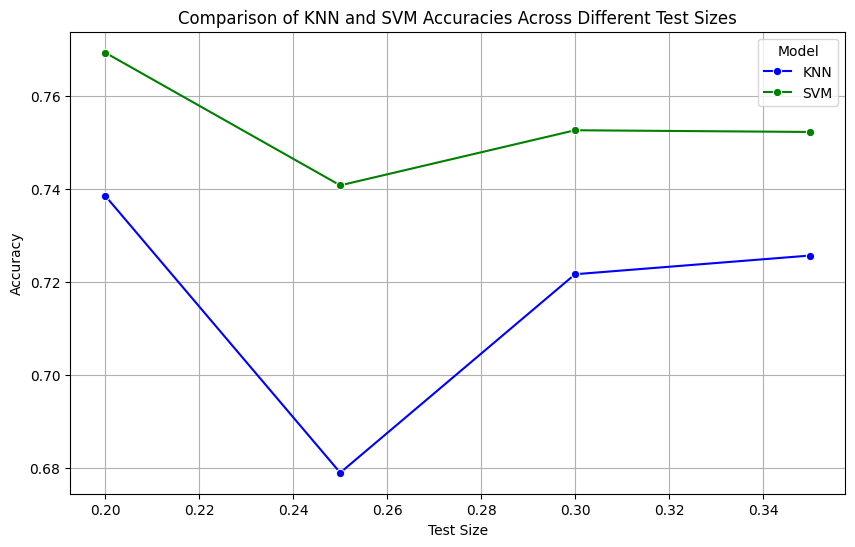

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
test_sizes = list(knn_accuracies.keys())
data = pd.DataFrame({
    "Test Size": test_sizes * 2,
    "Accuracy": list(knn_accuracies.values()) + list(svm_accuracies.values()),
    "Model": ["KNN"] * len(test_sizes) + ["SVM"] * len(test_sizes)
})

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x="Test Size", y="Accuracy", hue="Model", marker="o", palette=["blue", "green"])

# Add labels and title
plt.title("Comparison of KNN and SVM Accuracies Across Different Test Sizes")
plt.xlabel("Test Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

